In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Bang Bang Control
We want to limit, to some extend, the shock to the drive train. If the driver
pushes the controller full forward, the software will command the motor to
go from a full stop to full speed. This can cause a bad shock to the motor and
drive train. 

How can we limit this?

Text(0, 0.5, 'Command')

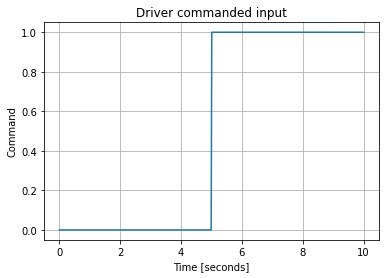

In [6]:
t = np.linspace(0, 10, 500)
input_cmd = np.zeros(500)
input_cmd[250::] = 1
plt.plot(t, input_cmd)
plt.grid()
plt.title('Driver commanded input')
plt.xlabel('Time [seconds]')
plt.ylabel('Command')

# Slew rate limiter
In the WPILib there is a class called the

![SlewRateLimiter](slew_rate_limiter.png)

This takes a single value. The larger that value, the slower the response. Lets
try a value to 2.


Text(0, 0.5, 'Command')

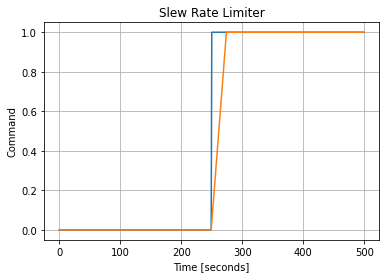

In [7]:
limit = 2
prev = 0
output_cmd = np.zeros(len(input_cmd))
for i, v in enumerate(input_cmd):
    output = input_cmd[i] - prev
    output = min(output, limit / 50)
    prev += output
    output_cmd[i] = prev
plt.plot(input_cmd, label='Input Cmd')
plt.plot(output_cmd, label='Output Cmd')
plt.grid()
plt.title('Slew Rate Limiter')
plt.xlabel('Time [seconds]')
plt.ylabel('Command')

# PID Controller
A PID Controller is a Proporational-Integral-derivative controller

![PID](PID_en.svg.png)

If you have a setpoint, lets saw the robots arm position, you can take the
motor encoder value (position), subtract the set point. This gives you an 
error value. That error value is then multiplied by a Proportional constant Kp.
The error is then integrated, and the output of the integral is multiplied by a
integral constant Ki. Finally the derivative of the error is multiplied by a 
derivative constant Kd. The outputs of those three operations are summed together.
That is used to drive an output. 

In [8]:
def run_pid(Kp, Ki, Kd, sp, sim_data):
    output = np.zeros(len(sim_data))
    error = np.zeros(len(sim_data))
    prev = 0
    for i, v in enumerate(sim_data):
        current_error = sp - v
        error[i] = current_error
        prev += current_error * Kp
        output[i] = prev

    return error, output

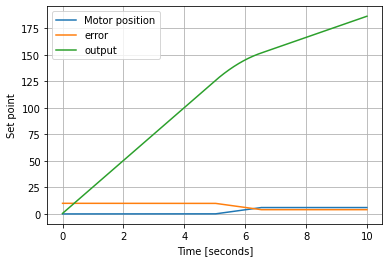

In [35]:
# Period in seconds, we run at 50 Hz
Tp = 1/50
# 10 seconds at 50 Hz
# Generate some bogus motor position data
sim_data = np.zeros(10 * int(1/Tp))
for i in range(len(sim_data)):
    if i > 6.5 * 50:
        # Do nothing
        sim_data[i] = sim_data[i - 1]
    elif i > 5 * 50:
        sim_data[i] += sim_data[i-1] + 4 * Tp
    
t = np.linspace(0, 10, len(sim_data))
# Set the setpoint to 10
Kp = 0.05
Ki = 0
Kd = 0
error, output = run_pid(Kp, Ki, Kd, 10, sim_data)

plt.plot(t, sim_data, label='Motor position')
plt.plot(t, error, label='error')
plt.plot(t, output, label='output')
plt.grid()
plt.xlabel('Time [seconds]')
plt.ylabel('Set point')
plt.legend()


In [10]:
with open('c:/ztemp/FRC_20230218_223257.csv') as f:
    lines = f.readlines()

t = []
enc = []
for line in lines:
    if "ArmEnc" in line:
        s = line.split(',')
        t.append(s[0])
        enc.append(s[2])

(282,)

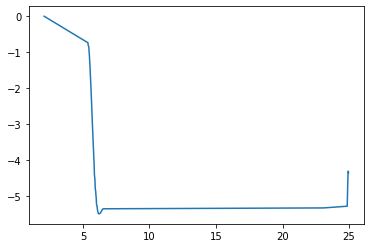

In [29]:
t = np.array(t).astype('float')
enc = np.array(enc).astype('float')
plt.plot(t[0:50], enc[0:50])
t.shape